# Cat/Dog Classifier<br>
## When given an image of a cat or dog, this model will identify if it is a cat or not.

## This prompt uses PyTorch, fastai, and Jupyter.<br>
**PyTorch** is a deep learning library.<br>
**fastai** is library that adds higher-level functionaly on top of PyTorch.<br>
**Jupyter Notebook** is a platform for writing code.

## Instructions <br>
Run the code. The model will import a dataset of pet images then train on the Resnet34 image classification model, thus learning to identify cats.<br> 
When you see the **Upload** button, press it and upload a photo of a cat or dog from your computer. <br>
The prompt will then respond **Ture** or **False** to the question, **"Is this a cat?"**<br>
The model will also state the **Probabilty** that the image is of a cat.


In [1]:
!pip install fastbook
!pip install ipywidgets

from ipywidgets import *

from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.1 MB/s eta 0:00:00a 0:00:01


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 137MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.178770,0.022009,0.007442,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.066071,0.016520,0.006766,00:59


In [2]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Click on the **Upload** button to upload an image of a cat from your computer.

Is this a cat?: True.
Probability it's a cat: 1.000000


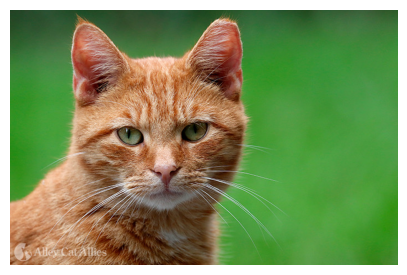

In [3]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
img.show()
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

## Try it again<br>
Upload a photo of a dog and see what happens.

In [4]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Is this a cat?: False.
Probability it's a cat: 0.000001


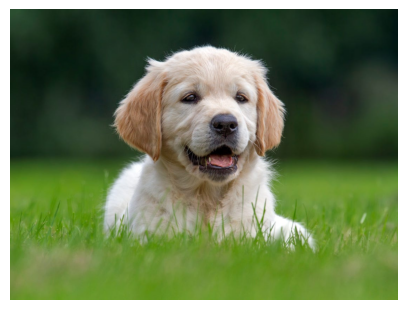

In [5]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
img.show()
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")